In [9]:
# !pip install netCDF4
# !pip install pysd

In [10]:
#!pip install pylab
%pylab inline
import pysd
model = pysd.read_vensim('./bass.mdl')

Populating the interactive namespace from numpy and matplotlib


In [11]:
model = pysd.load('./bass copy.py')
model.run(return_columns=['potential_customers'])

,potential_customers
0.0,100000.000000
0.1,99776.126751
0.2,99543.448043
0.3,99301.645636
0.4,99050.394331
...,...
999.6,33673.873563
999.7,33673.873563
999.8,33673.873563
999.9,33673.873563


In [12]:
model.doc#()

,Real Name,Py Name,Subscripts,Units,Limits,Type,Subtype,Comment
0,Customers,customers,None,person,"(nan, nan)",Stateful,Integ,None
1,Enemy customers,enemy_customers,None,person,"(nan, nan)",Stateful,Integ,None
2,FINAL TIME,final_time,None,Month,"(nan, nan)",Constant,Normal,The final time for the simulation.
3,INITIAL TIME,initial_time,None,Month,"(nan, nan)",Constant,Normal,The initial time for the simulation.
4,Potential Customers,potential_customers,None,person,"(nan, nan)",Stateful,Integ,None
5,SAVEPER,saveper,None,Month,"(nan, nan)",Auxiliary,Normal,The frequency with which output is stored.
6,TIME STEP,time_step,None,Month,"(nan, nan)",Constant,Normal,The time step for the simulation.
7,Time,time,None,None,"(nan, nan)",None,None,Current time of the model.
8,change rate,change_rate,None,,"(nan, nan)",Auxiliary,Normal,None
9,change to enemy,change_to_enemy,None,person/Month,"(nan, nan)",Auxiliary,Normal,None


In [13]:
values = model.run(return_columns=['Customers', 'Enemy customers', 'Potential Customers'])
values.head(10)

,Customers,Enemy customers,Potential Customers
0.0,0.000000,0.000000,100000.000000
0.1,111.286774,112.586474,99776.126751
0.2,225.465977,231.085980,99543.448043
0.3,342.589095,355.765270,99301.645636
0.4,462.706802,486.898867,99050.394331
0.5,585.868803,624.768845,98789.362351
0.6,712.123667,769.664541,98518.211792
0.7,841.518653,921.882205,98236.599143
0.8,974.099524,1081.724581,97944.175896
0.9,1109.910356,1249.500406,97640.589239


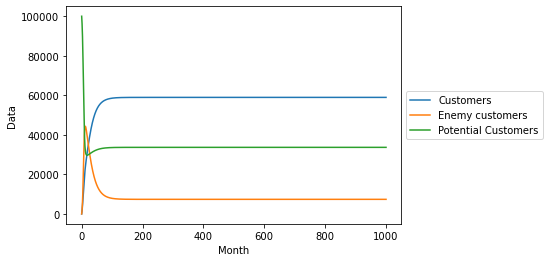

In [14]:
# смотрим сходимость
import pandas as pd
model = pysd.load('./bass copy.py')
model.run(return_columns=['potential_customers'])

values = model.run(return_columns=['Customers', 'Enemy customers', 'Potential Customers'])

values.plot()
plt.ylabel('Data')
plt.xlabel('Month')
plt.legend(loc='center left', bbox_to_anchor=(1,.5));

In [15]:
values_diff = values.diff()
values_diff['diff'] = abs(values_diff['Customers'])+abs(values_diff['Enemy customers'])+abs(values_diff['Potential Customers'])
values_diff_null = values_diff[values_diff['diff'] == 0]
print('Все отклонения по всем трем переменным равны:', values_diff_null['diff'].sum(), 
      '\nСходимость начинается с индекса:', values_diff_null.index[0], '\nСходится к константе по Customers:', round(values.iloc[5973, 0], 0))

Все отклонения по всем трем переменным равны: 0.0 
Сходимость начинается с индекса: 597.3 
Сходится к константе по Customers: 58951.0


In [16]:
import numpy as np

# задаем параметры модели, которые будем варьировать
p11 = np.linspace(0.01, 0.99, 5)
p13 = np.linspace(0.01, 0.99, 5)
p21 = np.linspace(0.01, 0.99, 5)
p23 = np.linspace(0.01, 0.99, 5)

# задаем количество точек в обучающей и проверочной выборках
n_train = 500
n_test = 100

# генерируем обучающую выборку
train_X = np.zeros((n_train, 4))
train_Y = np.zeros(n_train)

for i in range(n_train):
    # выбираем случайные значения параметров модели из заданных интервалов
    rand_p11 = np.random.choice(p11)
    rand_p13 = np.random.choice(p13)
    rand_p21 = np.random.choice(p21)
    rand_p23 = np.random.choice(p23)

    # вычисляем долю рынка по модели Басса
    p = (rand_p11 + rand_p13 + rand_p21 * rand_p13 / (rand_p13 + rand_p23)) / (1 + rand_p21)

    # сохраняем параметры модели и долю рынка
    train_X[i] = np.array([rand_p11, rand_p13, rand_p21, rand_p23])
    train_Y[i] = p

# генерируем проверочную выборку
test_X = np.zeros((n_test, 4))
test_Y = np.zeros(n_test)

for i in range(n_test):
    # выбираем случайные значения параметров модели из заданных интервалов
    rand_p11 = np.random.choice(p11)
    rand_p13 = np.random.choice(p13)
    rand_p21 = np.random.choice(p21)
    rand_p23 = np.random.choice(p23)

    # вычисляем долю рынка по модели Басса
    p = (rand_p11 + rand_p13 + rand_p21 * rand_p13 / (rand_p13 + rand_p23)) / (1 + rand_p21)

    # сохраняем параметры модели и долю рынка
    test_X[i] = np.array([rand_p11, rand_p13, rand_p21, rand_p23])
    test_Y[i] = p


In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Создадим объект модели линейной регрессии
model = LinearRegression()

# Обучим модель на обучающих данных
model.fit(train_X, train_Y)

# Сделаем предсказания на тестовых данных
y_pred = model.predict(test_X)

from sklearn.metrics import r2_score

# Оценим качество предсказаний модели
r2 = r2_score(test_Y, y_pred)
r2

0.9397796879382635